Advent of Code 2019

In [118]:
from aocd import get_data
import itertools
from copy import copy
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math

In [223]:
# day 1
# part a
a = get_data(year=2019, day=1).split()
b = list(map(int, a))
c = [x//3-2 for x in b]
print('part a)\ntotal fuel = %i'%sum(c))
# part b
total_fuel = 0
for fuel in c:
    while fuel>0:
        total_fuel += fuel
        fuel = fuel//3-2
print('part b)\ntotal fuel = %i'%total_fuel)

part a)
total fuel = 3423279
part b)
total fuel = 5132018


In [222]:
# day 2
def grav_assist(b, x, y):
    b[1], b[2] = x, y
    ix = 0
    while True:
        if b[ix] == 99:
            return b[0]
        elif b[ix] == 1:
            b[b[ix+3]] = b[b[ix+1]] + b[b[ix+2]]
        elif b[ix] == 2:
            b[b[ix+3]] = b[b[ix+1]] * b[b[ix+2]]
        ix += 4

# part a
a = get_data(year=2019, day=2).split(',')
b = list(map(int, a))
print('part a)\nsolution = %i'%grav_assist(b.copy(), 12, 2))

# part b
xy_pairs = itertools.product(range(100), range(100))
for pair in xy_pairs:
    if grav_assist(b.copy(), *pair) == 19690720:
        print('noun, verb = ', pair, '\npart b)\nsolution = ', pair[0]*100+pair[1])
        break

part a)
solution = 3895705
noun, verb =  (64, 17) 
part b)
solution =  6417


In [226]:
# day 3
def generate_sections(moves):
    # return a list of all vertical and horizontal sections, 
    #   horizontals are (x0, x1, y0), with x0<x1
    #   verticals are (x0, y0, y1), wit y0<y1
    init = [0,0]
    sections = {'horizontal':[], 'vertical':[]}
    for move in moves:
        if move[0] == 'L':
            sections['horizontal'].append((init[0]-int(move[1:]), *init))
            init[0] -= int(move[1:])
        elif move[0] == 'R':
            sections['horizontal'].append((init[0], init[0]+int(move[1:]), init[1]))
            init[0] += int(move[1:])
        elif move[0] == 'U':
            sections['vertical'].append((*init, init[1]+int(move[1:])))
            init[1] += int(move[1:])
        elif move[0] == 'D':
            sections['vertical'].append((init[0], init[1]-int(move[1:]), init[1]))
            init[1] -= int(move[1:])
    return sections

def find_crossings(sections0, sections1):
    crossings = []
    for x0a,x0b,y0a in sections0['horizontal']:
        for x1a,y1a,y1b in sections1['vertical']:
            if (x0a < x1a < x0b) & (y1a < y0a < y1b):
                crossings.append((x1a, y0a))
    for x0a,x0b,y0a in sections1['horizontal']:
        for x1a,y1a,y1b in sections0['vertical']:
            if (x0a < x1a < x0b) & (y1a < y0a < y1b):
                crossings.append((x1a, y0a))
    return crossings

def distance_to_crossing(moves, crossing):
    init = [0,0]
    distance = 0
    for move in moves:
        old_init = init.copy()
        if move[0] == 'L':
            init[0] -= int(move[1:])
            if (init[0] < crossing[0] < old_init[0]) & (init[1] == crossing[1]):
                return distance + old_init[0] - crossing[0]
        elif move[0] == 'R':
            init[0] += int(move[1:])
            if (old_init[0] < crossing[0] < init[0]) & (init[1] == crossing[1]):
                return distance + crossing[0] - old_init[0]
        elif move[0] == 'U':
            init[1] += int(move[1:])
            if (old_init[1] < crossing[1] < init[1]) & (init[0] == crossing[0]):
                return distance + crossing[1] - old_init[1]
        elif move[0] == 'D':
            init[1] -= int(move[1:])    
            if (init[1] < crossing[1] < old_init[1]) & (init[0] == crossing[0]):
                return distance + old_init[1] - crossing[1]
        distance += int(move[1:])
    print('no crossing found')
    return

b = get_data(year=2019, day=3).splitlines()
c = [x.split(',') for x in b]

all_coords = []
sections = {}
for i, moves in enumerate(c):
    sections[i] = generate_sections(moves)
crossings = find_crossings(sections[0], sections[1])
min_crossing = min(crossings, key = lambda el:abs(el[0])+abs(el[1]))
print('part a)\nmin crossing occurs at ',min_crossing)
print('distance to min crossing is %i'%np.linalg.norm(min_crossing,1))

# part b 
crossings_dict = {x:0 for x in crossings}
for crossing in crossings:
    for i in range(2):
        dist = distance_to_crossing(c[i], crossing)
        crossings_dict[crossing] += dist
#     print(crossing, crossings_dict[crossing])
print('part b)\naggregate distance to min crossing is %i'%min(crossings_dict.values()))

part a)
min crossing occurs at  (-1059, 166)
distance to min crossing is 1225
part b)
aggregate distance to min crossing is 107036


In [228]:
# day 4 
def match_two(num):
#     return True if there are two consecutive numbers (e.g. 2344 is True, 23444 is False)
    if len(set(num)) == len(num):
        return False
    if num[0] == num[1] != num[2]:
        return True
    if num[-1] == num[-2] != num[-3]:
        return True
    for i,x in enumerate(num[1:-2]):
        if num[i]!=num[i+1]==num[i+2]!=num[i+3]:
            return True
    return False

a = get_data(year=2019, day=4)
b = a.split('-')
c = list(map(int, b))

# part a 
counter = 0
for x in range(c[0], c[1]+1):
    lx = list(str(x))
    if (lx == sorted(lx)) and (len(set(lx)) < len(lx)):
        counter += 1
print('part a)\nnum possible passwords = %i'%counter)

# part b
counter = 0
for x in range(c[0], c[1]+1):
    lx = list(str(x))
    if (lx == sorted(lx)) and (match_two(lx)):
        counter += 1
print('part b)\nnum possible passwords = %i'%counter)


part a)
num possible passwords = 1653
part b)
num possible passwords = 1133


In [216]:
# day 5 (TBD)

In [229]:
# day 6 
a = get_data(year=2019, day=6)
b = a.split()
c = [x.split(')') for x in b]

# part a
G = nx.Graph()
G.add_edges_from(c)
# nx.draw(G, node_size=1)
num_orbits = 0
for node in G.nodes():
    num_orbits += nx.shortest_path_length(G, source='COM', target=node)
print('part a)\ntotal orbits = %i'%num_orbits)

# part b
print('part b)\ntotal orbits = %i'%(nx.shortest_path_length(G, source='YOU', target='SAN')-2))

part a)
total orbits = 251208
part b)
total orbits = 397


In [217]:
# day 7 (TBD)

part a)
max num of zeros = 5
solution = 2904
part b)


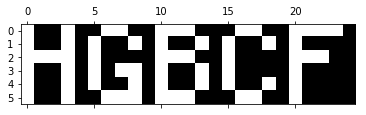

In [233]:
# day 8 
a = get_data(year=2019, day=8)
b = list(map(int, list(a)))
c = np.array(b)

# part a
x,y = 25,6
z = int(len(b)/(x*y))
d = c.reshape(z,y,x)
max_zeroes = 1000000
for i in range(z):
    sub_mat = d[i,:,:]
    sum_zeros = sum(sum(sub_mat == 0))
    if sum_zeros < max_zeroes:
        max_zeroes = sum_zeros
        result = sum(sum(sub_mat == 1)) * sum(sum(sub_mat == 2))
print('part a)\nmax num of zeros = %i'%max_zeroes)
print('solution = %i'%result)

# part b
updated_image = 2 - d[0,:,:]    # adjusted to transparent=0, white=1 and the other black=2
for i in range(1,z):
    layer = 2 - d[i,:,:]
    updated_image += layer*(updated_image==0)   # only update the places where layer = 0 
print('part b)')
plt.spy(updated_image-1)

In [218]:
# day 10
def prime_factors(n):
    i = 2
    factors = set()
    while i * i <= n:
        if n % i:
            i += 1
        else:
            n //= i
            factors.add(i)
    if n > 1:
        factors.add(n)
    return factors
    
a = get_data(year=2019, day=10)
b = a.split()
dim_x, dim_y = len(b[0]), len(b)
asteroid_coords = [(x,y) for x in range(dim_x) for y in range(dim_y) if b[y][x] == '#']

# generate all possible updates that are not colinear 
all_possible_updates = [(1,0), (0,1), (-1,0), (0,-1)]
for dx in range(1,dim_x):
    for dy in range(1,dim_y):
        a,b = prime_factors(dx), prime_factors(dy)
        if a.intersection(b) == set():
            all_possible_updates += [(dx, dy), (dx, -dy), (-dx, dy), (-dx, -dy)]
len(all_possible_updates)

# part a
vis_sats = np.zeros([dim_x, dim_y])
for i, coords_0 in enumerate(asteroid_coords):
    all_possible_updates_temp = all_possible_updates.copy()
    vis_sats[coords_0] = 0
    for j, coords_1 in enumerate(asteroid_coords):
        if coords_0 != coords_1:
            possible_in_range = (coords_1[0] - coords_0[0], coords_1[1] - coords_0[1])
            max_div = math.gcd(*possible_in_range)
            possible_update = tuple(x/max_div for x in possible_in_range)
            if possible_update in all_possible_updates_temp:
                vis_sats[coords_0] += 1
                all_possible_updates_temp.remove(possible_update)

max_sats = np.max(vis_sats)
b=np.isin(vis_sats, max_sats)
c = np.where(b)
optimal_coords = (c[0][0], c[1][0])
print('part a)\nmax number of sats = %i'%max_sats)
print('optimal sat coords = (%i, %i)'%(optimal_coords[0], optimal_coords[1]))

# part b
ordered_updates = sorted(all_possible_updates, key=lambda x: (5*np.pi/2 + math.atan2(x[1],x[0]))%(2*np.pi), reverse=False)
sat_killer_counter = 0
asteroid_coords_temp = asteroid_coords
for update in ordered_updates:
    for i in range(1,42):
        poss_asteroid = (optimal_coords[0]+update[0]*i, optimal_coords[1]+update[1]*i)
        if poss_asteroid in asteroid_coords_temp:
            sat_killer_counter += 1
            asteroid_coords_temp.remove(poss_asteroid)
            if sat_killer_counter == 200:
                print('part b)\n200th destroyed asteroid = (%i, %i)\nsolution = %i'%(poss_asteroid[0], poss_asteroid[1], poss_asteroid[0]*100 + poss_asteroid[1]))
            break

part a)
max number of sats = 340
optimal sat coords = (28, 29)
part b)
200th destroyed asteroid = (26, 28)
solution = 2628


In [219]:
#day 11 (TBD)

In [214]:
# day 12 (TBD)
def update_velocity(all_pair, positions, velocities):
    all_axis = positions[0].keys()
    updated_velocities = velocities.copy()
    for x,y in all_pairs:
        for axis in all_axis:
            if positions[x][axis] > positions[y][axis]:
                updated_velocities[x][axis] -= 1
                updated_velocities[y][axis] += 1
            elif positions[x][axis] < positions[y][axis]:
                updated_velocities[x][axis] += 1
                updated_velocities[y][axis] -= 1
    return updated_velocities

def update_position(all_pair, positions, velocities):
    all_axis = positions[0].keys()
    updated_positions = positions.copy()
    for moon in range(4):
        for axis in all_axis:
            updated_positions[moon][axis] += velocities[moon][axis]
    return updated_positions

def calculate_energy(positions, velocities):
    total_energy = 0
    all_axis = positions[0].keys()
    for moon in range(4):
        kinetic, potential = 0, 0
        for axis in all_axis:
            kinetic += np.abs(positions[moon][axis])
            potential += np.abs(velocities[moon][axis])
        total_energy += kinetic * potential
    return total_energy
            

a = get_data(year=2019, day=12)
b = a[1:-1].split('>\n<')

positions, velocities = {}, {}
for i,x in enumerate(b):
    coords = x.split(', ')
    positions[i] = {x[0]:int(x[2:]) for x in coords}
    velocities[i] = {x[0]:0 for x in coords}

all_pairs = list(itertools.combinations(range(len(positions)), 2))
for i in range(1000):
    velocities = update_velocity(all_pairs, positions, velocities)
    positions = update_position(all_pairs, positions, velocities)
    total_energy = calculate_energy(positions, velocities)
#     print('it %i total energy = %i'%(i, total_energy))